In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import nltk
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import TreebankWordTokenizer
plt.style.use('fivethirtyeight')
sns.set()
plt.rcParams['figure.figsize'] = (12,12)

In [3]:
GRAPH = '../Results/Graphs'
TABLE = '..Results/Tables'
DATA = '../data'
VERSION = 5  #1: Merged All 2:Cleaned
os.listdir(DATA)

['Dataset_v3.csv',
 'Dataset_v2.csv',
 '.~lock.Information_Technology.csv#',
 'Jobs (2016-2018).xlsx',
 'ONET_Occupations.csv',
 'vector.npy',
 'Information_Technology.csv',
 'Dataset_v1.csv',
 'Jobs (2019-2021) - Bdjobs.xlsx',
 'skills.csv',
 'Dataset_v5.csv',
 'Dataset_v4.csv',
 'ISCO.csv',
 'Skill_Rank.csv']

In [4]:
df = pd.read_csv(os.path.join(DATA,'Dataset_v'+str(VERSION) + '.csv'))
# ONET = pd.read_csv(os.path.join(DATA,'ONET_Occupations.csv'))
ONET = pd.read_csv(os.path.join(DATA,'Information_Technology.csv'))
skills = pd.read_csv(os.path.join(DATA,'skills.csv'))

In [5]:
skill_corr_df = pd.DataFrame(index = df.index,columns=skills['Skills'].tolist()).fillna(0)

In [6]:
SKILLS = skill_corr_df.columns.tolist()[:-2]

In [7]:
SKILLS

['PHP',
 'Database',
 'SQL',
 'JavaScript',
 'SEO',
 'Android',
 'CSS',
 'Oracle',
 'HTML',
 'MySQL',
 'C',
 'JAVA',
 'WordPress',
 'Laravel',
 'Linux',
 'jQuery',
 'iOS',
 'Bootstrap',
 'AJAX',
 'OOP',
 'ASP.NET',
 'Angular',
 'SQL Server',
 'QA',
 'Excel',
 'PowerPoint',
 'Word',
 'Photoshop',
 'Illustrator',
 'Python',
 'C#',
 'ERP',
 'HTML5',
 'CSS3',
 'Git',
 'JS',
 'React',
 'AWS',
 'MVC',
 'Windows']

In [8]:
for i , context in enumerate((df['Job_Responsibility'] + df['Job_Context']).values):
    tokens = TreebankWordTokenizer().tokenize(str(context).lower())
    for skill in skills['Skills'].tolist():
        if str(skill).lower() in tokens:
            skill_corr_df.loc[i,skill] += 1

In [9]:
years = list(range(2016,2022))
for year in tqdm(years):
    temp_df = df[df['Year'] == year]
    for i,context in enumerate((temp_df['Job_Responsibility'] + temp_df['Job_Context']).values):
#             if str(skill).lower() in str(context).lower():
            if str('SQL Server').lower() in str(context).lower():
                skill_corr_df.loc[i,'SQL Server'] += 1
            if str('object oriented').lower() in str(context).lower():
                 skill_corr_df.loc[i,'OOP'] += 1
            if str('search engine').lower() in str(context).lower():
                 skill_corr_df.loc[i,'SEO'] += 1
            if str('C#').lower() in str(context).lower():
                 skill_corr_df.loc[i,'C#'] += 1

100%|██████████| 6/6 [00:00<00:00, 11.70it/s]


In [10]:

skill_corr_df.loc[:,'SQL'] -= skill_corr_df.loc[:,'SQL Server']
skill_corr_df.loc[:,'HTML'] += skill_corr_df.loc[:,'HTML5']
skill_corr_df.loc[:,'CSS'] += skill_corr_df.loc[:,'CSS3']
skill_corr_df.loc[:,'JavaScript'] += skill_corr_df.loc[:,'JS']
skill_corr_df.drop(['HTML5','CSS3','JS'],inplace=True,axis=1)

In [11]:
skill_corr_df[skill_corr_df < 0] = 0
skill_corr_df[skill_corr_df > 0] = 1

In [12]:
[SKILLS.remove(x) for x in ['HTML5','CSS3','JS']]

[None, None, None]

In [13]:
SKILLS

['PHP',
 'Database',
 'SQL',
 'JavaScript',
 'SEO',
 'Android',
 'CSS',
 'Oracle',
 'HTML',
 'MySQL',
 'C',
 'JAVA',
 'WordPress',
 'Laravel',
 'Linux',
 'jQuery',
 'iOS',
 'Bootstrap',
 'AJAX',
 'OOP',
 'ASP.NET',
 'Angular',
 'SQL Server',
 'QA',
 'Excel',
 'PowerPoint',
 'Word',
 'Photoshop',
 'Illustrator',
 'Python',
 'C#',
 'ERP',
 'Git',
 'React',
 'AWS',
 'MVC',
 'Windows']

In [15]:
skill_corr_df['Year'] = df['Year']
skill_corr_df['Name'] = df['Name']
skill_corr_df['Title'] = df['MergedTitle']

In [16]:
skill_corr_df.Title.value_counts()

Software Developers                                8072
Project Management Specialists                     5563
Network and Computer Systems Administrators        3887
Web Developers                                     3510
Web and Digital Interface Designers                1856
Computer User Support Specialists                  1513
Business Intelligence Analysts                     1209
Search Marketing Strategists                        837
Computer Occupations, All Other                     584
Software Quality Assurance Analysts and Testers     386
Database Architects                                 363
Document Management Specialists                     304
Video Game Designers                                232
Name: Title, dtype: int64

In [12]:
START_YR = 2016
END_YR = 2020
df['Name'].value_counts()

BJIT Ltd.                                373
Banglalink                               239
ReliSource Technologies Ltd.             170
BRAC IT Services Limited                 162
Catalyst BPO (Pvt.) Ltd.                 155
                                        ... 
ColorSpit                                  1
Owners’ Association of Impetus Centre      1
Pioneer Casual Wear Ltd.                   1
Xenial System Limited                      1
Skybzr.com Ltd                             1
Name: Name, Length: 5717, dtype: int64

In [56]:
temp = skill_corr_df[skill_corr_df['Year'].isin([2016,2020])].reset_index()
# temp = temp[temp.Title.isin(['Web Developers','Web and Digital Interface Designers','Web Administrators'])].reset_index()
temp = temp[temp.Title.isin(['Database Architects'])].reset_index()
# temp = temp[temp.Title.isin(['Computer Systems Engineers/Architects'])].reset_index()
temp

,level_0,index,PHP,Database,SQL,JavaScript,SEO,Android,CSS,Oracle,...,Git,React,AWS,MVC,Windows,API,Marketing,Year,Name,Title
0,111,10709,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2016,Advanced Chemical Industries Limited (ACI),Database Architects
1,174,10772,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2016,Emgenex,Database Architects
2,218,10816,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2016,NewsCred Ltd.,Database Architects
3,271,10869,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2016,ReliSource Technologies Ltd.,Database Architects
4,333,10931,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2016,BJIT Ltd.,Database Architects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,8722,24890,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2020,M/s. Munshi Engineers,Database Architects
108,8871,25039,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2020,NYBSYS (PVT.) LTD,Database Architects
109,8929,25097,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,2020,ASA,Database Architects
110,9086,25254,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,2020,Object Data Inc.,Database Architects


In [57]:
shift_df = pd.DataFrame(index=skills['Skills'],columns = skills['Skills']).fillna(0)

In [58]:
for i in tqdm(range(len(temp))):
    for from_ in SKILLS:
        if temp.loc[i,from_] == 1:
            for j in range(len(temp)):
                if temp.loc[i,'Name'] == temp.loc[j,'Name']:
                    for to in SKILLS:
                        if temp.loc[j,to] == 1:
    #                         print(i,j)
    #                         print(from_,to)
    #                         print(temp.loc[i,'Year'],temp.loc[j,'Year'])
                            if temp.loc[i,'Year'] > temp.loc[j,'Year']:
                                shift_df.loc[from_,to] += 1

100%|██████████| 112/112 [00:00<00:00, 1053.97it/s]


In [59]:
# shift_df = pd.read_csv('Shift.csv',index_col=0)
shift_df.sum()

Skills
PHP            0
Database       0
SQL            0
JavaScript     0
SEO            0
Android        0
CSS            0
Oracle         0
HTML           0
MySQL          0
C              0
JAVA           0
WordPress      0
Laravel        0
Linux          0
jQuery         0
iOS            0
Bootstrap      0
AJAX           0
OOP            0
ASP.NET        0
Angular        0
SQL Server     0
QA             0
Excel          0
PowerPoint     0
Word           0
Photoshop      0
Illustrator    0
Python         0
C#             0
ERP            0
HTML5          0
CSS3           0
Git            0
JS             0
React          0
AWS            0
MVC            0
Windows        0
API            0
Marketing      0
dtype: int64

In [53]:
import networkx as nx 
G = nx.DiGraph() 
for i in SKILLS: 
    for j in SKILLS: 
        if shift_df[i][j] >1: 
            G.add_edge(i,j,weight=shift_df[i][j]) 

In [54]:
widths = nx.get_edge_attributes(G, 'weight')
np.array(list(widths.values()),dtype=int)

array([4, 3])

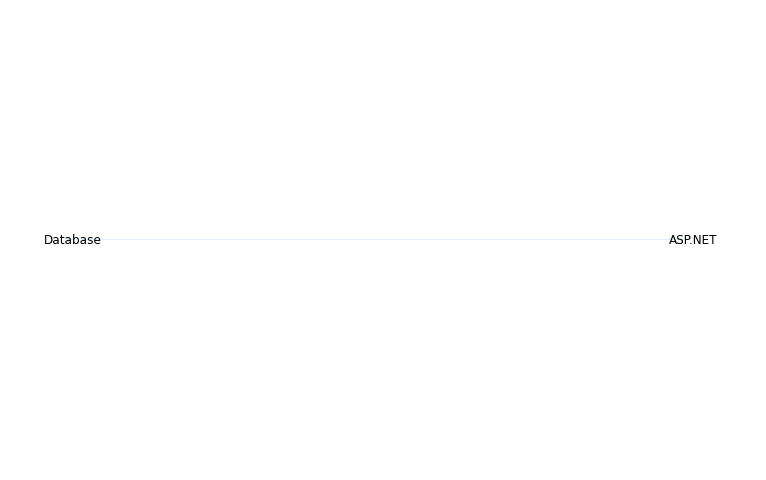

In [55]:

nodelist = G.nodes()

plt.figure(figsize=(12,8))

pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=1500,
                       node_color='lightblue',
                       alpha=0
                      )
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=np.array(list(widths.values()),dtype=int)/5,
                       edge_color='lightblue',
                       alpha=0.6)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
# plt.savefig('Shift.png',dpi=350)
plt.show()


In [116]:
df[df['ONET Title'].isin(['Computer Systems Engineers/Architects'])]

,JobTitle,Name,PublishDate,IndustryName,Cat_Name,TotalVacancy,number_applicants,JobType,JobLevel,Country,...,MinExp,MaxExp,MinAge,MaxAge,MaleGender,FemaleGender,Job_Context,Job_Responsibility,Year,ONET Title
36,Drive Test Engineer,ONS Telecom (Bangladesh) Limited,2018-01-02 16:18:00,Telecommunication,IT/Telecommunication,0,433,Contract,Entry,Bangladesh,...,1.0,2.0,22.0,30.0,1,0,NaN,Drive Test/Walk Test Engineer works on perform...,2018,Computer Systems Engineers/Architects
64,System Engineer,NASSA GROUP,2018-01-04 09:40:00,Garments/ Textile,IT/Telecommunication,2,1188,FullTime,Entry,Bangladesh,...,3.0,5.0,NaN,NaN,1,1,NaN,Provide a single point of contact for end user...,2018,Computer Systems Engineers/Architects
93,System Engineer,ASA,2018-01-06 17:35:00,NGO/Development,IT/Telecommunication,0,715,FullTime,Entry,Bangladesh,...,3.0,4.0,NaN,NaN,1,1,NaN,"Responsible for managing Servers, Storage (SAN...",2018,Computer Systems Engineers/Architects
102,Assistant Hardware Engineer,Square InformatiX Limited,2018-01-07 16:22:00,Information Technology (IT),IT/Telecommunication,0,0,FullTime,Mid,Bangladesh,...,2.0,3.0,NaN,25.0,1,1,"SQUARE InformatiX Ltd, a sister concern of SQU...","Responsible for repairing all type of CPU, Pri...",2018,Computer Systems Engineers/Architects
123,System Engineer,ATI Limited,2018-01-08 18:20:00,Information Technology (IT),IT/Telecommunication,2,235,FullTime,Mid,Bangladesh,...,4.0,5.0,27.0,33.0,1,1,"ATI Limited, being a leading Software Developm...","Planning, Designing and Implementing Enterpris...",2018,Computer Systems Engineers/Architects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28245,Deep learning & Computer Vision Engineer,Apurba Technologies,2021-06-26 10:32:00,Information Technology (IT),IT/Telecommunication,7,138,FullTime,Mid,Bangladesh,...,2.0,NaN,NaN,NaN,0,0,We are seeking a number of deep learning & com...,Improve our existing Machine Learning systems ...,2021,Computer Systems Engineers/Architects
28257,UI/UX Engineer,WellDev Bangladesh LTD,2021-06-26 21:57:00,Information Technology (IT),IT/Telecommunication,2,0,FullTime,Mid,Bangladesh,...,2.0,3.0,NaN,NaN,0,0,We are looking for a UI/UX Engineer to create ...,"Collaboration: with web developers, users, an...",2021,Computer Systems Engineers/Architects
28265,IT Engineer,Central Insurance Company Ltd.,2021-06-27 16:42:00,Bank/ Non-Bank Fin. Institution,IT/Telecommunication,0,836,FullTime,Entry,Bangladesh,...,2.0,3.0,NaN,30.0,0,0,"Central Insurance Company Ltd, one of the firs...",Higher priority base support for Insurance ERP...,2021,Computer Systems Engineers/Architects
28272,Engineer - Tech Support (Technology Division...,Confidence Group.,2021-06-28 11:01:00,Telecommunication,IT/Telecommunication,0,838,FullTime,Entry,Bangladesh,...,1.0,NaN,NaN,NaN,0,0,Digicon Telecommunication Limited is looking f...,"Installation, link delivery and troubleshootin...",2021,Computer Systems Engineers/Architects


In [96]:
def temp_fn(x):
    if 'Software Engineer' in str(x['JobTitle']): return 'Software Developers'
    else : return x['ONET Title']
df['ONET Title'] = df.apply(temp_fn,axis=1)

In [97]:
df['ONET Title'].value_counts()

Software Developers                                             6772
Web Developers                                                  3424
Information Technology Project Managers                         2768
Web and Digital Interface Designers                             1908
Computer Occupations, All Other                                 1783
Computer User Support Specialists                               1625
Business Intelligence Analysts                                  1396
Computer Systems Engineers/Architects                           1369
Project Management Specialists                                  1025
Computer Programmers                                             998
Search Marketing Strategists                                     846
Network and Computer Systems Administrators                      812
Telecommunications Engineering Specialists                       737
Information Security Analysts                                    640
Computer Network Support Specialis